# Regression from scratch

# Linear Regression

In [447]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

![title](Capture.PNG)

In [456]:
#Generating Random numbers
rng = np.random.RandomState(1)
B1 = .03 * rng.rand(500)
B0=np.ones((500,1))

In [457]:
## Stacking the B0 and B1 together in X variable
X=np.column_stack((B0,B1))
## Generating Target variable Matrix
y=np.random.rand(500)

Text(0,0.5,'dependent Variable')

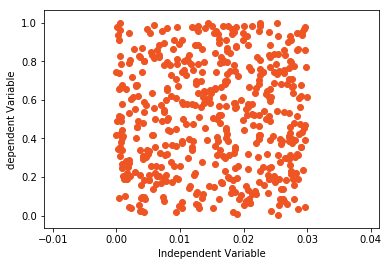

In [458]:
# Ploting Line
#plt.plot(X, y, color='#58b970', label='Regression Line', 'r.')
# Ploting Scatter Points
plt.scatter(B1, y, c='#ef5423', label='Scatter Plot')
plt.xlabel("Independent Variable")
plt.ylabel("dependent Variable")

![title](content_Formula.PNG)

In [459]:
xx=inv(np.matmul(np.transpose(X),X))
xy=np.matmul(np.transpose(X),y)
B=np.matmul(xx,xy)
print(B)

[0.49578759 0.93964488]


# Root Mean Square error and R-square

![title](rmse.PNG)

In [460]:
#rmse
rmse = 0
b0=B[0]
b1=B[1]
for i in range(len(B1)):
    observed=b0+b1*X[:,1:][i]
    #print(observed)
    rmse += (y[i] - observed) ** 2
    #rmse = np.sqrt(rmse)
print(rmse)

[40.16635421]


# Total Sum of Square

![title](Capture.PNG)

In [461]:
##Total variation in y,also represent as (Actual value of y minus Average value of y)
msa = 0
for i in range(len(B1)):
    msa += (y[i] - np.mean(y)) ** 2
    msa = msa/len(y)
print(msa)     

6.880927239274768e-05


In [462]:
# R-square value
#R-square means that the variation of y described by the x variables
rsquare=0
ssr=0
tss=0
observed=0
for i in range(len(B1)):
    observed=b0+b1*X[:,1:][i]
    ssr +=(y[i] - observed) ** 2
    tss += (y[i] - np.mean(y)) ** 2
rsquare=1-(ssr/tss)
print(rsquare)

[0.00086904]


Text(0.5,1,'Regression Line plot')

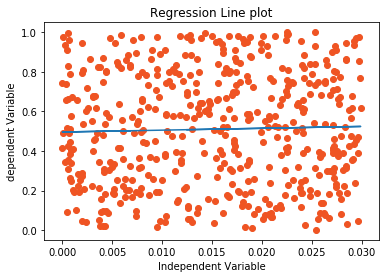

In [463]:
# Ploting Scatter Points
#observed=b0+b1*X[:,1:][i]
#reg_line=[(m*x)+b for i in range(len(B1)]
reg_line=[b1*X[:,1:][i]+b0 for i in range(len(B1))]
plt.plot(B1,reg_line)
plt.scatter(B1, y, c='#ef5423', label='Scatter Plot')
plt.xlabel("Independent Variable")
plt.ylabel("dependent Variable")
plt.title("Regression Line plot")

# Using Sklearn Library

In [360]:
## Using Sklearn Library
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(X,y)
print('Coffecient of Linear regression model',reg.coef_,
      '\nIntercept of Linear regression model ',reg.intercept_)

Coffecient of Linear regression model [0.         0.49059693] 
Intercept of Linear regression model  0.46991603381571967


In [361]:
# Y Prediction
Y_pred = reg.predict(X)
# R2 Score
r2_score = reg.score(X, y)
#print(np.sqrt(mse))
print(r2_score)

0.0024365197579064857


# Multiple Regression using Matrixs

In [443]:
ran = np.random.RandomState(123)
B0=np.ones((10,1))
B1=50*ran.rand(10,5)

In [444]:
## Stacking the B0 and B1 together in X variable
X=np.column_stack((B0,B1))
## Generating Target variable Matrix
y=np.random.rand(10,1)

In [445]:
## Getting the Red color part from above Image
xx=inv(np.matmul(np.transpose(X),X))
xy=np.matmul(np.transpose(X),y)
B=np.matmul(xx,xy)
print(B)

[[ 0.76136723]
 [-0.00414432]
 [-0.023577  ]
 [ 0.01667267]
 [ 0.00527605]
 [-0.00488203]]


In [446]:
## Using Sklearn Library
reg = linear_model.LinearRegression()
reg.fit(X,y)
print('Coffecient of Linear regression model',reg.coef_,
      '\nIntercept of Linear regression model ',reg.intercept_)

Coffecient of Linear regression model [[ 0.         -0.00414432 -0.023577    0.01667267  0.00527605 -0.00488203]] 
Intercept of Linear regression model  [0.76136723]


# Multiple Regression on data-set

In [326]:
import pandas as pd
df=pd.read_csv("mlr05.csv")

In [327]:
# Dividing data-set into Target and Independent variable
y=df['Y'].values
a=df.drop('Y',axis=1).values

The only thing I need to generate is sequence of 1 and then stack it with Independent variiables 

In [328]:
X=np.column_stack((np.ones(shape=y.shape),a))

In [330]:
xx=inv(np.matmul(np.transpose(X),X))
xy=np.matmul(np.transpose(X),y)

In [331]:
B=np.matmul(xx,xy)
print(B)

[10.51046037 -0.05948369  0.80587881  0.01605365  0.17191025  0.4109845 ]


In [332]:
##Using Library of Sklearn
mod = linear_model.LinearRegression()
mod.fit(X,y)
print('Coffecient of Linear regression model',mod.coef_,
      '\nIntercept of Linear regression model ',mod.intercept_)

Coffecient of Linear regression model [ 0.         -0.05948369  0.80587881  0.01605365  0.17191025  0.4109845 ] 
Intercept of Linear regression model  10.510460373089467
